<a href="https://colab.research.google.com/github/rezamohammadloo/Clothes-Classifier-Using-CNNs/blob/main/facialEcpressionClassifierCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#connecting to google drive to get teh data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing needed pachages
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Extract the archive
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [5]:
#main directories
train_dir = '/content/train'
test_dir  = '/content/test'

In [9]:
#analyzing the data
lable_names = os.listdir(train_dir)
print(f'class labels:{lable_names}')

for i in lable_names:
  print(f'\nnumber of train images in class {i} is: {len(os.listdir(os.path.join(train_dir, i)))}')
  print(f'number of test  images in class {i} is: {len(os.listdir(os.path.join(test_dir, i)))}')


class labels:['surprise', 'angry', 'disgust', 'neutral', 'sad', 'happy', 'fear']

number of train images in class surprise is: 3171
number of test  images in class surprise is: 831

number of train images in class angry is: 3995
number of test  images in class angry is: 958

number of train images in class disgust is: 436
number of test  images in class disgust is: 111

number of train images in class neutral is: 4965
number of test  images in class neutral is: 1233

number of train images in class sad is: 4830
number of test  images in class sad is: 1247

number of train images in class happy is: 7215
number of test  images in class happy is: 1774

number of train images in class fear is: 4097
number of test  images in class fear is: 1024


<Axes: >

<Figure size 1500x1000 with 0 Axes>

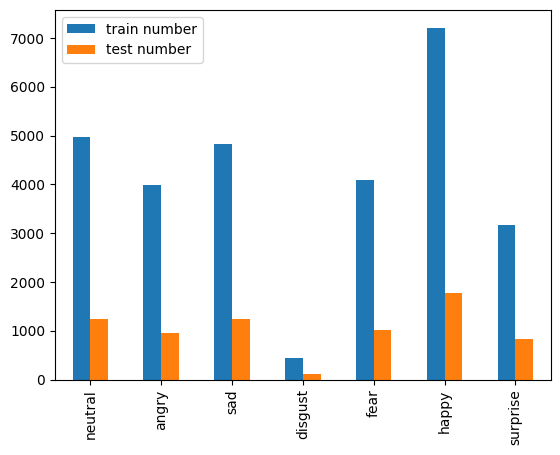

In [ ]:

dict = {}
for i in lable_names:
  dict.update(({i:[ len(os.listdir(os.path.join(train_dir, i))) , len(os.listdir(os.path.join(test_dir, i)))]}))

df = pd.DataFrame(dict).T
df.columns = ['train number', 'test number']

plt.figure(figsize = (15,10))
df.plot(kind = 'bar' )

**Not so much balanced!**

In [12]:
model = tf.keras.models.Sequential([
    #first conv layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),#, input_shape=(48, 48, 1)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),

    #second conv layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #third conv layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(7, activation='softmax')
])
optimizer = Adam()

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 21, 21, 32)        0

In [13]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen  = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(48, 48),  # All images will be resized to 48x48
        batch_size=64,
        class_mode='categorical')# Since we use categorical_crossentropy loss, we need binary labels


# Flow validation images in batches of 64 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch = 28709 // 64,  # 28709 images = batch_size(512) * steps
      epochs=EPOCHS,
      validation_data = validation_generator,
      validation_steps = 7178 // 64,  # 7178 images = batch_size(512) * steps
      verbose=1,
      shuffle = True)

Epoch 1/20
448/448 [==============================] - 112s 243ms/step - loss: 1.6563 - accuracy: 0.3565 - val_loss: 1.5249 - val_accuracy: 0.4143
Epoch 2/20
448/448 [==============================] - 100s 223ms/step - loss: 1.4152 - accuracy: 0.4537 - val_loss: 1.4159 - val_accuracy: 0.4561
Epoch 3/20
448/448 [==============================] - 101s 225ms/step - loss: 1.2994 - accuracy: 0.5031 - val_loss: 1.3562 - val_accuracy: 0.4725
Epoch 4/20
448/448 [==============================] - 113s 253ms/step - loss: 1.2083 - accuracy: 0.5398 - val_loss: 1.2635 - val_accuracy: 0.5177
Epoch 5/20
448/448 [==============================] - 110s 245ms/step - loss: 1.1346 - accuracy: 0.5717 - val_loss: 1.2699 - val_accuracy: 0.5173
Epoch 6/20
448/448 [==============================] - 99s 220ms/step - loss: 1.0608 - accuracy: 0.5940 - val_loss: 1.2501 - val_accuracy: 0.5359
Epoch 7/20
448/448 [==============================] - 97s 216ms/step - loss: 0.9835 - accuracy: 0.6274 - val_loss: 1.1658 - v

<ipython-input-15-25fe6731c02a>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


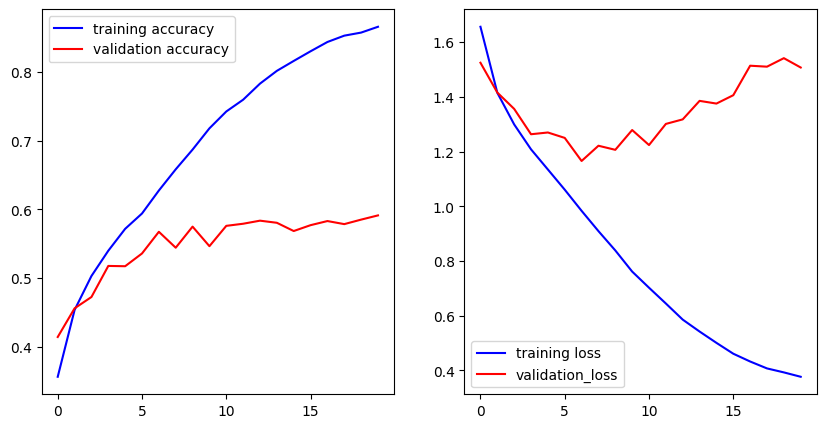

In [15]:
#plotting acc and loss curves to get a beeter understanding of our network's performance
plt.subplots(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label="training accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label="training loss")
plt.plot(history.history['val_loss'], color='r', label="validation_loss")
plt.legend()

Obvious overfitting...

In [16]:
#